In [1]:
import networkx as nx
import numpy as np

G = nx.DiGraph()
edges = [(1,2),(2,4),(4,6),(6,8),(8,10),(10,12),(12,17),(12,16),(12,15),(12,14),
    (1,3),(3,5),(5,7),(7,9),(9,11),(11,13),(13,18),(13,19),(13,20),(13,21)]
G.add_edges_from(edges)

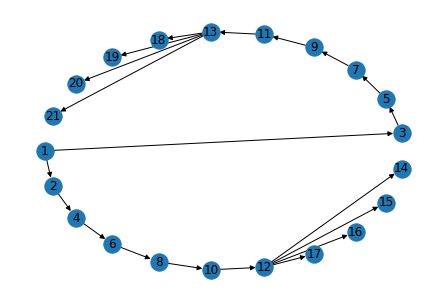

In [2]:
nx.draw_shell(G, with_labels=True)

In [4]:
from lib import get_embeddings, get_embeddings_fast, heat_kernel, HERMLAP_S, HERMLAP_T
N = len(G.nodes)
S = np.linspace(2.0, 20.0, num=50)
T = np.linspace(1.0, 50.0, num=50)
q = 0.02
kernel = heat_kernel
c = 2

embeddings_slow = get_embeddings(A=G, S=S, T=T, q=q, kernel=kernel)
embeddings_fast = get_embeddings_fast(A=G, S=S, T=T, q=q)
print(embeddings_fast.shape, embeddings_slow.shape)

(21, 5000) (21, 5000)


In [6]:
from sklearn.decomposition import PCA

pca1 = PCA(n_components=2)
pca_embeddings_slow = pca1.fit_transform(embeddings_slow)
print(pca1.explained_variance_ratio_)

pca2 = PCA(n_components=2)
pca_embeddings_fast = pca2.fit_transform(embeddings_fast)
print(pca2.explained_variance_ratio_)

[0.74852697 0.18171859]
[0.92028759 0.03832778]


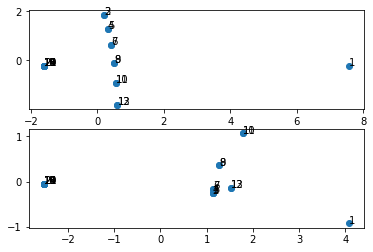

In [7]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(2)
ax[0].scatter(pca_embeddings_slow[:,0], pca_embeddings_slow[:, 1])
nodes = list(G.nodes)
for n, x, y in zip(nodes, pca_embeddings_slow[:,0], pca_embeddings_slow[:, 1]):
    ax[0].annotate(n, (x, y))

ax[1].scatter(pca_embeddings_fast[:,0], pca_embeddings_fast[:, 1])
for n, x, y in zip(nodes, pca_embeddings_fast[:,0], pca_embeddings_fast[:, 1]):
    ax[1].annotate(n, (x, y))

# Test to see if expm_multiply produces "correct" results

In [8]:
from scipy.sparse.linalg import expm_multiply
import scipy.sparse as sp
L_q = np.matrix([[3, 3-2j],[3+2j, 2]])
Lambda, H = np.linalg.eig(L_q)

B = np.eye(2)
kernel = lambda x : np.exp(-x)
v1 = H @ np.diag(kernel(Lambda)) @ H.H @ B
print(v1)
print(expm_multiply(-L_q, B))

[[ 1.34993635-6.15191607e-17j -1.28766684+8.58444560e-01j]
 [-1.28766684-8.58444560e-01j  1.77915863+1.55512236e-20j]]
[[ 1.34993635-6.79708281e-17j -1.28766684+8.58444560e-01j]
 [-1.28766684-8.58444560e-01j  1.77915863+6.78416206e-17j]]


In [22]:
np.linalg.eigh(L_q)

(array([-1.14005494,  6.14005494]),
 matrix([[-0.65674936+0.j        , -0.75410893+0.j        ],
         [ 0.62745656+0.41830437j, -0.5464485 -0.364299j  ]]))

In [23]:
import scipy


def eigen(A):
    eigenValues, eigenVectors = scipy.linalg.eigh(A)
    idx = np.argsort(eigenValues)[::-1]
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return eigenValues, eigenVectors

eigen(L_q)

(array([ 6.14005494, -1.14005494]),
 array([[-0.75410893+0.j        , -0.65674936+0.j        ],
        [-0.5464485 -0.364299j  ,  0.62745656+0.41830437j]]))

In [19]:
X = np.random.rand(1000, 1000)

In [21]:
import scipy
import time
start = time.time()
scipy.linalg.eig(X)
end = time.time()

print(end-start)
start = time.time()
np.linalg.eig(X)
end = time.time()

print(end-start)

0.9119505882263184
0.873314380645752


In [34]:
np.linalg.eigh(X)

(array([-1.26030306e+01, -1.25284384e+01, -1.22464599e+01, -1.21252094e+01,
        -1.19371367e+01, -1.18658583e+01, -1.17873505e+01, -1.16906239e+01,
        -1.16233406e+01, -1.15186757e+01, -1.14483928e+01, -1.12842153e+01,
        -1.12339205e+01, -1.12115089e+01, -1.11529698e+01, -1.10861344e+01,
        -1.09894848e+01, -1.08389644e+01, -1.07992442e+01, -1.07517265e+01,
        -1.06779507e+01, -1.05480748e+01, -1.04928844e+01, -1.04463248e+01,
        -1.03471236e+01, -1.03160754e+01, -1.02513049e+01, -1.01640452e+01,
        -1.00908902e+01, -1.00581806e+01, -1.00444456e+01, -9.95367659e+00,
        -9.86331838e+00, -9.77677558e+00, -9.75634058e+00, -9.65394793e+00,
        -9.57643246e+00, -9.54218552e+00, -9.49051512e+00, -9.44372676e+00,
        -9.40782866e+00, -9.24042140e+00, -9.19610007e+00, -9.17603796e+00,
        -9.11220398e+00, -9.07299119e+00, -9.00747512e+00, -8.97307467e+00,
        -8.95737745e+00, -8.89616096e+00, -8.83408002e+00, -8.79507845e+00,
        -8.7

In [ ]:
adj = np.matrix([[0, 1],[1, 0]])
embeddings_slow = get_embeddings(A=G, S=S, T=T, q=q, kernel=kernel)
embeddings_fast = get_embeddings_fast(A=G, S=S, T=T, q=q)

In [ ]:
(embeddings_fast-embeddings_slow).mean()

-0.005734790111125829

In [ ]:
embeddings_slow

array([[9.30391075e-01, 8.62471332e-01, 8.91049546e-01, ...,
        6.28186899e-05, 7.06708771e-05, 7.85230312e-05],
       [9.91950742e-01, 9.82130552e-01, 9.70620746e-01, ...,
        3.19106012e-05, 3.58993673e-05, 3.98881202e-05],
       [9.93943240e-01, 9.86002967e-01, 9.76243012e-01, ...,
        3.22902445e-05, 3.63264823e-05, 4.03627106e-05],
       ...,
       [1.00312272e+00, 1.00203248e+00, 9.96974433e-01, ...,
        3.22646680e-05, 3.62977951e-05, 4.03309318e-05],
       [1.00312272e+00, 1.00203248e+00, 9.96974433e-01, ...,
        3.22646680e-05, 3.62977951e-05, 4.03309318e-05],
       [1.00312272e+00, 1.00203248e+00, 9.96974433e-01, ...,
        3.22646680e-05, 3.62977951e-05, 4.03309318e-05]])